# VAE Model
> implements simple version of Variational AutoEncoder (VAE) for educational purposes

In [1]:
#| default_exp models.vae

In [2]:
#| hide
%load_ext autoreload
%autoreload 2
from nbdev.showdoc import *


In [3]:
#| export

# import numpy as np
import torch
import torch.nn as nn
from slg_generative.data.datasets import FashionMnistDataset
from matplotlib import pyplot as plt

# from torch.optim import Adam
# from tqdm import tqdm
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# import ipdb
# import torchvision

SEED = 42
# np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

/Users/syl20/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#| hide
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [5]:
#| export

class AEEncoder(nn.Module):
    "Simple AE Encoder"
    
    def __init__(self,
        input_dim:int=784, # Input dimension
        hidden_dim:int=512, # Hidden dimension
        latent_dim:int=2 # Latent dimension
        ):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, latent_dim)        

    def forward(self,
        x:torch.FloatTensor # B x D
        )->torch.FloatTensor: # B x D
        seq = nn.Sequential(self.layer1, nn.ReLU(), self.layer2, nn.ReLU())
        z = seq(x)
        return z


In [6]:
#| export 

def plot_latent2D(encoder, data, num_batches=128):
    "Scatter plot of latent variables"
    from ipdb import set_trace; set_trace()
    for i, (x, y) in enumerate(data):
        z = encoder(x)
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

def plot_latent3D(encoder, data, num_batches=128):
    "Scatter plot of latent variables"
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    for i, (x, y) in enumerate(data):
        z = encoder(x)
        z = z.to('cpu').detach().numpy()
        p = ax.scatter(z[:, 0], z[:, 1], z[:, 2], c=y, cmap='tab10')
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
    fig.colorbar(p, ax=ax)

In [ ]:
ds = FashionMnistDataset("~/Data/fashion-mnist/fashion-mnist_train.csv")
dl = torch.utils.data.DataLoader(ds, batch_size=128, shuffle=True)
X, y = next(iter(dl))
e = AEEncoder(input_dim=784, hidden_dim=512, latent_dim=2)
ee = e(X)
print(f"latent output shape {ee.shape}, {ee.type()}")

latent output shape torch.Size([128, 2]), torch.FloatTensor


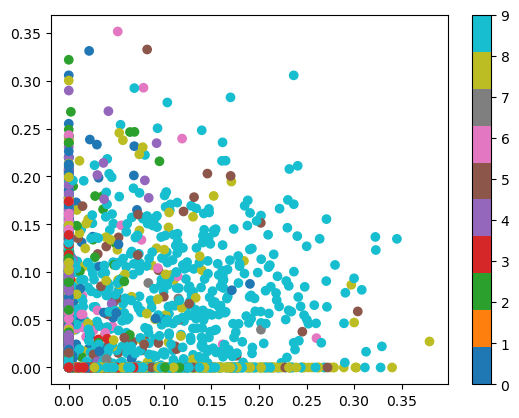

In [ ]:
plot_latent2D(e, dl)

In [ ]:
e = AEEncoder(input_dim=784, hidden_dim=512, latent_dim=3)
ee = e(X)
print(f"latent output shape {ee.shape}, {ee.type()}")

latent output shape torch.Size([128, 3]), torch.FloatTensor


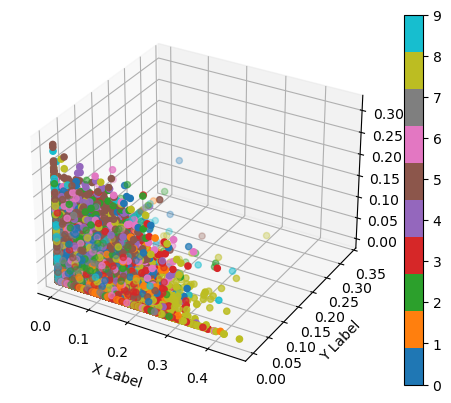

In [ ]:
plot_latent3D(e, dl)

In [ ]:
#| export

class AEDecoder(nn.Module):
  "Decoder"
  
  def __init__(self,
    latent_dim=2, # Latent dimension
    hidden_dim=512, # Hidden dimension
    output_dim=784, # Output dimension
    ):
    super().__init__()
    self.layer1 = nn.Linear(latent_dim, hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, output_dim)

  def forward(self,
    z:torch.Tensor # Latent variables
    )->torch.Tensor: # Image output
    seq = nn.Sequential(self.layer1, nn.ReLU(), self.layer2, nn.Sigmoid())
    x = seq(z)
    return(x)

In [ ]:
e = AEEncoder(input_dim=784, hidden_dim=512, latent_dim=2)
ee = e(X)
d = AEDecoder(latent_dim=2, hidden_dim=512, output_dim=784)
dd = d(ee)
print(dd.shape)

torch.Size([128, 784])


In [ ]:
#| export

class AutoEncoder(nn.Module):
  "autoencoder"

  def __init__(self,
    input_dim=784, # Output dimension
    hidden_dim=512, # Hidden dimension
    latent_dim=2, # Latent dimension
    ):
    super().__init__()
    self.encoder = AEEncoder(input_dim=input_dim, hidden_dim=hidden_dim,latent_dim=latent_dim)
    self.decoder = AEDecoder(latent_dim=latent_dim, hidden_dim=hidden_dim, output_dim=input_dim)
  
  def forward(self, x:torch.Tensor)->torch.Tensor:
    z = self.encoder(x)
    return self.decoder(z)

In [ ]:
ae = AutoEncoder(input_dim=784, hidden_dim=512, latent_dim=2)
out = ae(X)
print(out.shape)

torch.Size([128, 784])


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()